# Context

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv('data/train.csv', skipinitialspace = True)
codes_data = pd.read_csv('data/codes.csv', sep = ';')
types_data = pd.read_csv('data/types.csv', sep = ';')

# Data Exploration

## train.csv

`train_data.csv` file has 4400 rows and 6 columns. Let's verify does `train_data` variable has correct shape

In [3]:
train_data.shape

(4400, 6)

So, `train_data` has correctly information about provided dataset

Let's verify columns by printing preview of `train_data`

In [4]:
train_data.head()

,client_id,datetime,code,type,amount,target
0,16004843,245 22:10:18,5411,1010,-7928.08,0
1,20873616,433 07:44:21,4814,1030,-56.15,0
2,65231233,164 15:58:23,5411,1010,-4689.47,1
3,29536165,413 11:47:51,5411,1010,-3703.52,1
4,66473821,280 05:17:26,6010,7030,67377.47,1


Let's explore `train_data` columns:

In [5]:
train_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,client_id,code,type,amount,target
count,4400.00,4400.00,4400.00,4400.00,4400.00
mean,51180948.42,5591.18,2477.99,-25829.42,0.45
std,28459423.46,618.25,2239.28,379993.04,0.50
min,31385.00,742.00,1010.00,-11229578.86,0.00
25%,26409535.00,5211.00,1030.00,-22459.16,0.00
50%,53203093.50,5541.00,1110.00,-5362.35,0.00
75%,75082762.25,6010.00,2370.00,-1122.96,1.00
max,99938948.00,9399.00,7075.00,6737747.32,1.00


Let's explore `train_data` column types:

In [6]:
train_data.dtypes

client_id      int64
datetime      object
code           int64
type           int64
amount       float64
target         int64
dtype: object

Let's calclulate number of unique `client_id` items. May be they are unique?

In [7]:
train_data['client_id'].is_unique

False

So, client_id has duplicated values and cannot be used as column id

Let split `datetime` column to 2 independent

In [8]:
train_data[['unknown_0', 'time']] = train_data['datetime'].str.split(' ', expand = True).apply(lambda x: x.str.strip())
train_data.drop('datetime', axis = 1, inplace = True)
train_data['unknown_0'] = train_data['unknown_0'].astype('int')
train_data.head()

,client_id,code,type,amount,target,unknown_0,time
0,16004843,5411,1010,-7928.08,0,245,22:10:18
1,20873616,4814,1030,-56.15,0,433,07:44:21
2,65231233,5411,1010,-4689.47,1,164,15:58:23
3,29536165,5411,1010,-3703.52,1,413,11:47:51
4,66473821,6010,7030,67377.47,1,280,05:17:26


Let's convert time to seconds:

In [9]:
import time
import datetime


def convert_time_to_seconds(date):
    t = time.strptime(date, '%H:%M:%S')
    return int(datetime.timedelta(hours = t.tm_hour, minutes = t.tm_min, seconds = t.tm_sec).total_seconds())


train_data['time'] = train_data['time'].apply(convert_time_to_seconds)
train_data

,client_id,code,type,amount,target,unknown_0,time
0,16004843,5411,1010,-7928.08,0,245,79818
1,20873616,4814,1030,-56.15,0,433,27861
2,65231233,5411,1010,-4689.47,1,164,57503
3,29536165,5411,1010,-3703.52,1,413,42471
4,66473821,6010,7030,67377.47,1,280,19046
...,...,...,...,...,...,...,...
4395,15762885,5499,1110,-6288.56,1,435,0
4396,32301971,5411,1010,-4289.70,0,395,77346
4397,28558979,6011,2011,-89836.63,1,41,22149
4398,87252636,6010,7071,59584.15,0,438,54284


## codes.csv

`codes.csv` file has 184 rows and 2 columns. Let's verify does `codes_data` variable has correct shape

In [10]:
codes_data.shape

(184, 2)

So, `codes_data` has correctly information about provided dataset

Let's explore `codes_data` columns and their types

In [11]:
codes_data.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [12]:
codes_data.describe()

,code
count,184.000000
mean,6046.793478
std,1470.328104
min,742.000000
25%,5208.250000
50%,5813.500000
75%,7283.000000
max,9402.000000


In [13]:
codes_data.dtypes

code                 int64
code_description    object
dtype: object

Let's verify uniquess of `code` column

In [14]:
codes_data['code'].is_unique

True

Sode `code` column could be used as Id

In [15]:
codes_data.set_index('code', inplace = True)
codes_data

,code_description
code,
5944,"Магазины по продаже часов, ювелирных изделий и..."
5621,Готовые сумочные изделия
5697,"Услуги по переделке, починке и пошиву одежды"
7995,Транзакции по азартным играм
5137,"Мужская, женская и детская спец-одежда"
...,...
5044,"Офисное, фотографическое, фотокопировальное, и..."
5983,"Горючее топливо — уголь, нефть, разжиженный бе..."
5994,Дилеры по продаже печатной продукции


## types.csv

`types.csv` file has 155 rows and 2 columns. Let's verify does `types_data` variable has correct shape

In [16]:
types_data.shape

(155, 2)

So, `codes_data` has correctly information about provided dataset

Let's explore `codes_data` columns and their types

In [17]:
types_data.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [18]:
types_data.describe()

,type
count,155.000000
mean,10819.045161
std,80000.258847
min,1000.000000
25%,2385.500000
50%,4040.000000
75%,7027.500000
max,999999.000000


In [19]:
types_data.dtypes

type                 int64
type_description    object
dtype: object

Let's verify uniquess of `type` column

In [20]:
types_data['type'].is_unique

True

Sode `type` column could be used as Id

In [21]:
types_data.set_index('type', inplace = True)
types_data

,type_description
type,
8001,Установление расх. лимита по карте
2411,Перевод с карты на счет др.лица в одном тер. б...
4035,н/д(нет данных)
3001,Комиссия за обслуживание ссудного счета
2420,Перевод с карты на счет физ.лица в другом тер....
...,...
4110,Плата за получение наличных в АТМ.
2320,Безналичный перевод денежных средств через POS
7040,Перевод на карту (с карты) через POS (в предел...


## Data visualtization and relationship analysis

Let's look at `code` column in our training set:

In [22]:
code_groups = train_data.groupby(['code'])['target'].agg(['size', 'mean']).reset_index()
code_groups.head()

,code,size,mean
0,742,1,1.000000
1,3000,1,0.000000
2,4111,3,0.666667
3,4112,10,0.500000
4,4121,8,0.375000


In [23]:
code_groups['size'].describe()

count    105.000000
mean      41.904762
std      144.727763
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      945.000000
Name: size, dtype: float64

As we see, 50% of codes has less than 3 values and 75% of codes has less than 10 value. So `code` column is very unbalanced

In [24]:
code_groups = code_groups.sort_values('size', ascending = False)
code_groups.head(20)

,code,size,mean
76,6011,945,0.456085
30,5411,660,0.459091
75,6010,631,0.426307
10,4814,621,0.436393
12,4829,396,0.489899
33,5499,240,0.445833
28,5331,91,0.439560
54,5812,79,0.455696
57,5912,75,0.440000
36,5541,68,0.426471


Also, we see, that most of the popular codes has mean around 0.5, so very few values `code` column are important:

In [25]:
meaningful_coef = 0.35
min_size = 5
meaningful_type_groups = code_groups[
    ((code_groups['mean'] > 1 - meaningful_coef) | (code_groups['mean'] < meaningful_coef)) & (
            code_groups['size'] >= min_size)]
pd.merge(meaningful_type_groups, codes_data, left_on = 'code', right_index = True)

,code,size,mean,code_description
92,7995,21,0.285714,Транзакции по азартным играм
21,5211,16,0.312500,Лесо- и строительный материал
40,5641,11,0.272727,"Детская одежда, включая одежду для самых мален..."
51,5732,9,0.222222,Продажа электронного оборудования
78,6051,8,0.750000,"Не-финансовые институты — иностранная валюта, ..."
46,5699,8,0.250000,Различные магазины одежды и аксессуаров
77,6012,7,0.142857,Финансовые институты — торговля и услуги
99,8099,6,0.333333,"Практикующие врачи, медицинские услуги, нигде ..."
47,5712,5,0.200000,"Оборудование, мебель и бытовые принадлежности ..."
80,6536,5,0.200000,Денежные переводы MasterCard MoneySend


These codes could be good separators

Let make similar investigation for `type` variable

In [26]:
type_groups = train_data.groupby(['type'])['target'].agg(['size', 'mean']).reset_index()
type_groups.head()

,type,size,mean
0,1010,1030,0.468932
1,1030,612,0.434641
2,1100,79,0.481013
3,1110,609,0.431856
4,1200,64,0.375000


In [27]:
type_groups['size'].describe()

count      44.000000
mean      100.000000
std       222.970537
min         1.000000
25%         2.500000
50%        10.500000
75%        49.250000
max      1030.000000
Name: size, dtype: float64

50% of types has less than 10 values and maximum column has 1030 values. This column could be considered as unbalanced too 

In [28]:
type_groups.sort_values('size', ascending = False, inplace = True)
type_groups.head(20)

,type,size,mean
0,1010,1030,0.468932
7,2010,690,0.442029
1,1030,612,0.434641
3,1110,609,0.431856
40,7070,435,0.427586
17,2370,222,0.495495
32,7010,155,0.496774
37,7030,98,0.428571
2,1100,79,0.481013
4,1200,64,0.375000


We see similar results as for `code` column: most of the popular types has mean around 0.5, so very few values `type` column are important:

In [29]:
meaningful_type_groups = type_groups[
    ((type_groups['mean'] > 1 - meaningful_coef) | (type_groups['mean'] < meaningful_coef)) & (type_groups['size'] > 5)]
pd.merge(meaningful_type_groups, types_data, left_on = 'type', right_index = True)

,type,size,mean,type_description
41,7071,49,0.346939,Перевод на карту (с карты) через Мобильный бан...
30,6110,11,0.181818,Возврат покупки. POS
11,2110,10,0.800000,Наличные. АТМ
33,7011,9,0.333333,Взнос наличных через АТМ
22,4011,6,0.333333,Плата за получение наличных в АТМ банка (в дру...


These types would be good separators.

Let's try to find some insights about combination of `code` and `type` columns

In [30]:
code_type_groups = train_data.groupby(['code', 'type'])['target'].agg(['size', 'mean']).reset_index()
code_type_groups = code_type_groups[code_type_groups['size'] > 0]
code_type_groups = code_type_groups.sort_values('size', ascending = False)
code_type_groups.head(20)

,code,type,size,mean
156,6011,2010,690,0.442029
15,4814,1030,612,0.434641
152,6010,7070,435,0.427586
57,5411,1010,385,0.464935
58,5411,1110,270,0.451852
22,4829,2370,222,0.495495
64,5499,1010,203,0.472906
164,6011,7010,155,0.496774
149,6010,7030,98,0.428571
53,5331,1010,86,0.441860


In [31]:
meaningful_code_type_groups = code_type_groups[
    ((code_type_groups['mean'] > 1 - meaningful_coef) | (code_type_groups['mean'] < meaningful_coef)) & (
            code_type_groups['size'] >= min_size)]
meaningful_code_type_groups = pd.merge(meaningful_code_type_groups, types_data, left_on = 'type', right_index = True)
meaningful_code_type_groups = pd.merge(meaningful_code_type_groups, codes_data, left_on = 'code', right_index = True)
meaningful_code_type_groups

,code,type,size,mean,type_description,code_description
153,6010,7071,49,0.346939,Перевод на карту (с карты) через Мобильный бан...,Финансовые институты — снятие наличности вручную
66,5499,1110,35,0.285714,Покупка. POS,"Различные продовольственные магазины — рынки, ..."
89,5691,1110,9,0.333333,Покупка. POS,Магазины мужской и женской одежды
98,5732,1110,8,0.250000,Покупка. POS,Продажа электронного оборудования
86,5661,1110,6,0.166667,Покупка. POS,Обувные магазины
85,5661,1010,5,1.000000,Покупка. POS,Обувные магазины
91,5699,1110,5,0.200000,Покупка. POS,Различные магазины одежды и аксессуаров
92,5712,1110,5,0.200000,Покупка. POS,"Оборудование, мебель и бытовые принадлежности ..."
127,5964,1200,23,0.347826,Покупка. Зарубеж.,Прямой маркетинг — торговля через каталог
193,7995,1200,18,0.333333,Покупка. Зарубеж.,Транзакции по азартным играм


Let's look at `client_id`column:

In [32]:
client_sizes = train_data.groupby(['client_id']).size()
print('Total client size:', len(client_sizes))
print('Maximum orders for 1 client:', client_sizes.max())
print('Amount of clients with 1 order:', client_sizes[lambda x: x == 1].size)

Total client size: 2886
Maximum orders for 1 client: 107
Amount of clients with 1 order: 2062


Let's look at `unknown_0` column (3-digit number from `datetime` column)

In [33]:
train_data['unknown_0'].describe()

count    4400.000000
mean      245.194318
std       129.790589
min         0.000000
25%       136.000000
50%       253.000000
75%       356.000000
max       456.000000
Name: unknown_0, dtype: float64

<AxesSubplot:xlabel='unknown_0', ylabel='time'>

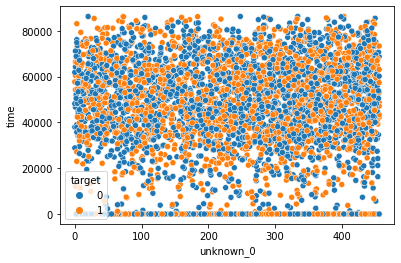

In [34]:
sns.scatterplot(data = train_data, x = 'unknown_0', y = 'time', hue = 'target')

We can suppose, than `unknown_0` column might be useless

Let's analyze `time` column:

In [35]:
train_data['time']

0       79818
1       27861
2       57503
3       42471
4       19046
        ...  
4395        0
4396    77346
4397    22149
4398    54284
4399    53416
Name: time, Length: 4400, dtype: int64

In [36]:
import numpy as np

interval_count_sec = 1800
time_data = train_data.groupby(
    [pd.cut(train_data['time'], np.arange(0, 3600 * 24 / interval_count_sec + 1) * interval_count_sec),
     'target']).size().rename('count').reset_index()
time_data['time'] = time_data['time'].apply(lambda col: int(col.left))
time_data

,time,target,count
0,0,0,6
1,0,1,6
2,1800,0,9
3,1800,1,2
4,3600,0,9
...,...,...,...
91,81000,1,19
92,82800,0,10
93,82800,1,11
94,84600,0,12


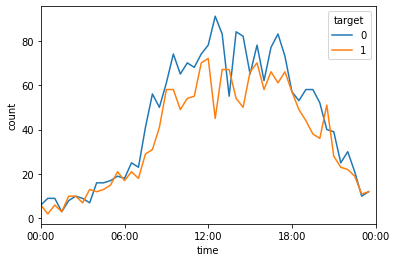

In [37]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data = time_data, x = 'time', y = 'count', hue = 'target')
plot.set_xlim(0, 3600 * 24)
plot.set_xticks(np.arange(0, 3600 * 24 + 1, 3600 * 6))
plot.set_xticklabels(['00:00', '06:00', '12:00', '18:00', '00:00'])
plt.show()

Wee can see that the biggest difference between target values are around 12:00

Let's verify amount column

In [38]:
train_data.groupby('target')['amount'].agg(['mean','sum','size','median'])

,mean,sum,size,median
target,,,,
0,-18633.723834,-45056344.23,2418,-5235.230
1,-34608.032437,-68593120.29,1982,-5491.825


We see, that statistics for  amount variables differs for different targets

Let's verify target columns:

In [39]:
train_data['target'].value_counts()

0    2418
1    1982
Name: target, dtype: int64

So, the target parameter is rather balanced

# Data manipulation

Let's write a function for preparing input data

In [40]:
def prepare(df):
    df[['unknown_0', 'time']] = df['datetime'].str.split(' ', expand = True)
    df.pop('datetime')
    interval_count_sec = 900
    df = df.join(pd.get_dummies(
        pd.cut(df['time'].apply(convert_time_to_seconds),
               np.arange(0, 3600 * 24 / interval_count_sec + 1) * interval_count_sec),
        prefix = 'time'))
    df.pop('time')
    
    df['amount_sign'] = df['amount'] >= 0
    df['amount'] = df['amount'].apply(lambda x: abs(x))
    
    cat_vars = ['type', 'code', 'unknown_0']
    for var in cat_vars:
        cat_list = pd.get_dummies(df[var], prefix = var)
        df = df.join(cat_list)
        df.pop(var)

    y = df.pop('target')

    return df, y

And execute it on our data

In [41]:
X_train, Y_train = prepare(pd.read_csv('data/train.csv'))
X_val, Y_val = prepare(pd.read_csv('data/val.csv'))

Columns, which are missing in training or validation data are not informative. So, let delete them:

In [42]:
def unite_columns(df1, df2: pd.DataFrame):
    for col in df1.columns:
        if col not in df2.columns:
            df1.pop(col)
    for col in df2.columns:
        if col not in df1.columns:
            df2.pop(col)

In [43]:
unite_columns(X_train, X_val)

Lets verify column count:

In [44]:
X_train.columns.size==X_val.columns.size

True

Let use LogisticRegression as the most popular kind of binary classifier

In [45]:
from sklearn.linear_model import LogisticRegression

weights = {
    0: Y_train.sum(),
    1: Y_train.size - Y_train.sum()
}

model = LogisticRegression(solver = 'saga', class_weight=weights)
model.fit(X_train, Y_train)

D:\data\python\3.10\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight={0: 1982, 1: 2418}, solver='saga')

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score
def verify_model(y_test, y_pred):
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test, y_pred)}')

In [47]:
verify_model(Y_val, model.predict(X_val))

Accuracy Score: 0.5675
Confusion Matrix: 
[[454   0]
 [346   0]]
Area Under Curve: 0.5
Recall score: 0.0


In [48]:
result = pd.DataFrame(
    {
        'column': X_train.columns,
        'weight': model.coef_.flatten()
    }
).sort_values('weight', ascending = False, key = abs)
result

,column,weight
1,amount,3.427250e-05
0,client_id,-1.895622e-05
99,type_1010,9.626267e-10
132,code_4829,7.118911e-10
170,code_6010,-6.731257e-10
...,...,...
287,unknown_0_21,9.648306e-13
485,unknown_0_428,9.327207e-13
500,unknown_0_443,3.113572e-13
443,unknown_0_383,-4.348262e-14


In [49]:
def sec_to_time(sec):
    return f'{int(sec / 3600 % 24):02d}:{int(sec % 3600 / 60):02d}:{sec % 60:02d}'

In [50]:
description = []
for col in result['column']:
    if col.startswith('code_'):
        code = int(col.replace('code_', ''))
        t = codes_data.loc[code]['code_description']
        description.append(t)
    elif col.startswith('type_'):
        type_ind = int(col.replace('type_', ''))
        t = types_data.loc[type_ind]['type_description']
        description.append(t)
    elif col.startswith('time_'):
        time_int = col.replace('time_(', '').replace(']', '').split(', ')
        time = sec_to_time(int(float((time_int[0])))) + '-' + sec_to_time(int(float((time_int[1]))))
        description.append(time)
    else:
        description.append(col)

result['description'] = description
result.head(20)

,column,weight,description
1,amount,3.427250e-05,amount
0,client_id,-1.895622e-05,client_id
99,type_1010,9.626267e-10,Покупка. POS
132,code_4829,7.118911e-10,Денежные переводы
170,code_6010,-6.731257e-10,Финансовые институты — снятие наличности вручную
98,amount_sign,-5.858526e-10,amount_sign
100,type_1030,-5.393139e-10,Оплата услуги. Банкоматы
110,type_2370,5.041576e-10,Списание с карты на карту по операции <перевод...
130,code_4814,-4.811493e-10,"Звонки с использованием телефонов, считывающих..."
52,"time_(45000.0, 45900.0]",-4.348880e-10,12:30:00-12:45:00


We have predicted that model would use 'amount' variable and '12:30:00-12:45:00' time interval. But 57% of accuracy is too low. I think, that we couldn't make good predictions using this dataset